# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Predictor-Corrector methods
===========================

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Geometrical interpretation of Euler’s method

Considering IVPs in the form

$${\boldsymbol{y}}'(x) = {\boldsymbol{f}}(x, {\boldsymbol{y}}(x)).$$

The simple (first order accurate, explicit) Euler method is

$${\boldsymbol{y}}_{n+1} = {\boldsymbol{y}}_n + h {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n).$$

Euler’s method is not sufficiently accurate for practical use. The
geometrical interpretation is that the slope (${\boldsymbol{y}}'$) over
the interval $[x_n, x_{n+1}]$ is approximated by the slope at the
*beginning* of the interval,

$${\boldsymbol{y}}' \simeq {\boldsymbol{y}}'(x_n).$$

Try a better approximation to the slope for a more accurate result.

## Predicting and correcting

Still using forward differencing for ${\boldsymbol{y}}'$, an “average”
slope is

$$\frac{{\boldsymbol{y}}_{n+1} - {\boldsymbol{y}}_n}{h} = \frac{{\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) +
          {\boldsymbol{f}}(x_{n+1}, {\boldsymbol{y}}_{n+1})}{2}.$$


Rearrange: gives the unknown ${\boldsymbol{y}}_{n+1}$ as

$${\boldsymbol{y}}_{n+1} = {\boldsymbol{y}}_n + \frac{h}{2} \left( {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) +
          {\boldsymbol{f}}(x_{n+1}, {\boldsymbol{y}}_{n+1}) \right).$$


But we need ${\boldsymbol{y}}_{n+1}$ to compute the
right-hand-side. 

$${\boldsymbol{y}}_{n+1} = {\boldsymbol{y}}_n + \frac{h}{2} \left( {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) +
          {\boldsymbol{f}}(x_{n+1}, {\boldsymbol{y}}_{n+1}) \right).$$

Instead compute a *guess* for ${\boldsymbol{y}}_{n+1}$, and use this
guess when required. This is the *predictor* step:

$${\boldsymbol{y}}_{n+1}^{(p)} = {\boldsymbol{y}}_n + h {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n)$$

if we use Euler’s method for the prediction.

Using this, apply the *corrector* step

$${\boldsymbol{y}}_{n+1} = {\boldsymbol{y}}_n + \frac{h}{2} \left( {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) +
          {\boldsymbol{f}}(x_{n+1}, {\boldsymbol{y}}_{n+1}^{(p)}) \right),$$

which describes the (Euler) *predictor-corrector* method.

The *local* error is $\propto {\cal O}(h^3)$.

### Example

Apply the Euler predictor-corrector method to

$$y'(x) = - \sin(x), \quad y(0) = 1$$

to integrate up to $x = 0.5$. With $h = 0.1$:

| $n$ | $x_n$ | $y_n$ | $f(x_n, y_n)$ | $y_{n+1}^{(p)}$ | $f(x_{n+1}, y_{n+1}^{(p)})$ | $\cos(x_n)$ |
|:---:|:-----:|:-----:|:-------------:|:---------------:|:---------------------------:|:-----------:|
|   0 |   0.0 |   1.000 |      0.000  |          1.000  |             -0.100          |    1.000
|   1 |   0.1 |   0.995 |     -0.100  |          0.985  |             -0.199          |    0.995
|   2 |   0.2 |   0.980 |     -0.199  |          0.960  |             -0.296          |    0.980
|   3 |   0.3 |   0.955 |     -0.296  |          0.926  |             -0.389          |    0.955
|   4 |   0.4 |   0.921 |     -0.389  |          0.882  |             -0.479          |    0.921
|   5 |   0.5 |   0.878 |             |                 |                             |    0.878
 
 
The error is $0.1\%$, not visible at this precision. With $h = 0.01$
then the error is $0.001\%$, showing second order convergence.

In [3]:
def euler_pc_method(f, x_end, y0, N):
    """Solve IVP y'=f(x, y(x)) on x \in [0, x_end] with y(0) = y0 using N+1 points, using the Euler predictor-corrector method."""
    
    h = x_end / N
    x = np.linspace(0.0, x_end, N+1)
    
    y = np.zeros((N+1, len(y0)))
    y[0, :] = y0
    
    for n in range(N):
        fn = f(x[n], y[n, :])
        yp = y[n, :] + h * fn
        y[n+1, :] = y[n, :] + h / 2.0 * (fn + f(x[n+1], yp))
        
    return x, y

def fn_euler_simple(x, y):
    """Simple function for Euler's method example"""
    
    return -np.sin(x)

# Example given above
x_5, y_5 = euler_pc_method(fn_euler_simple, 0.5, [1.0], 5)
x_50, y_50 = euler_pc_method(fn_euler_simple, 0.5, [1.0], 50)

print("Solution at x = 0.5 using h = 0.1 is y = {} (error is {:.2g}%).".format(y_5[-1, 0], 
      (y_5[-1, 0] - np.cos(0.5)) / np.cos(0.5) * 100.0))
print("Solution at x = 0.5 using h = 0.01 is y = {} (error is {:.2g}%).".format(y_50[-1, 0], 
      (y_50[-1, 0] - np.cos(0.5)) / np.cos(0.5) * 100.0))

Solution at x = 0.5 using h = 0.1 is y = 0.877684593428602 (error is 0.012%).
Solution at x = 0.5 using h = 0.01 is y = 0.8775835820373906 (error is 0.00012%).


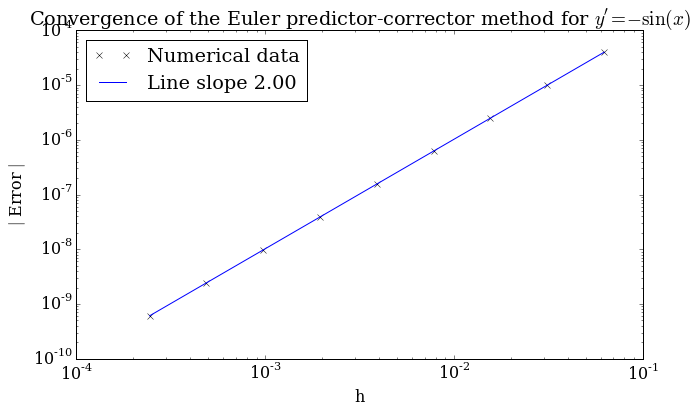

In [4]:
Npoints = np.array([2**i for i in range(3, 12)])
h = 0.5 / Npoints
err = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = euler_pc_method(fn_euler_simple, 0.5, [1.0], N)
    err[i] = np.abs(np.cos(0.5) - y[-1, 0])

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[:-1]), np.log(err[:-1]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of the Euler predictor-corrector method for $y' = -\sin(x)$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

### Example: 2

Consider the system

$$\left\{
      \begin{aligned}
        \dot{x} & = -y \\ \dot{y} & = x
      \end{aligned} \right., \quad x(0) = 1, \, \, y(0) = 0.$$

In polar coordinates this is $\dot{r} = 0$, $\dot{\phi} = 1$.

Use the predictor-corrector method with $h=0.1$. At
$t=500$ the result matches the correct answer to the eye. 

The growth of the radius makes the errors visible.

Use the predictor-corrector method with $h=0.01$. At
$t=500$ the result matches the correct answer to the eye. 

Looking at the growth of the radius makes the errors visible even now.

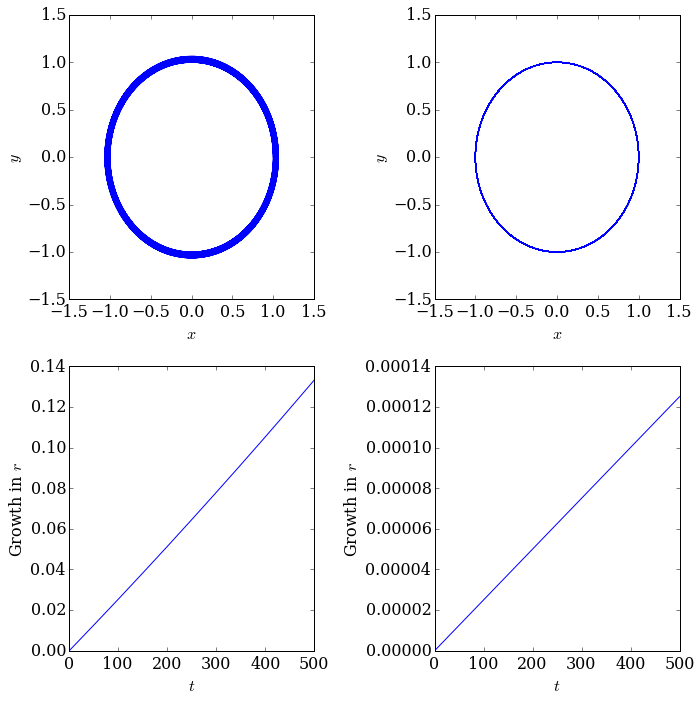

In [5]:
def fn_circular_motion(x, y):
    """Simple function for Euler's method example"""
    
    dfdt = np.zeros_like(y)
    dfdt[0] = -y[1]
    dfdt[1] =  y[0]
    
    return dfdt

# Example given above
y0 = np.array([1.0, 0.0])
t_0_1, y_0_1 = euler_pc_method(fn_circular_motion, 500.0, y0, 5000)
t_0_01, y_0_01 = euler_pc_method(fn_circular_motion, 500.0, y0, 50000)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax1.plot(y_0_1[:, 0], y_0_1[:, 1], 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2 = fig.add_subplot(222)
ax2.plot(y_0_01[:, 0], y_0_01[:, 1], 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax3 = fig.add_subplot(223)
ax3.plot(t_0_1, np.abs(y_0_1[:, 0]**2 + y_0_1[:, 1]**2 - 1.0), 'b-', label = '$h = 0.1$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('Growth in $r$')
ax4 = fig.add_subplot(224)
ax4.plot(t_0_01, np.abs(y_0_01[:, 0]**2 + y_0_01[:, 1]**2 - 1.0), 'b-', label = '$h = 0.01$')
ax4.set_xlabel('$t$')
ax4.set_ylabel('Growth in $r$')
fig.tight_layout()
plt.show()

## Errors

With quadrature using e.g. Simpson’s rule the *local* error on any
subinterval gave

$$|{\cal E}_{\text{global}}| \le \sum |{\cal E}_{\text{local}}|.$$

For an IVP we still have the *local* and *global* errors. But steps are
not independent so the error bound is different.

### Truncation vs. roundoff

All error (local and global) has two pieces: *truncation* and *roundoff*
error.

1.  Roundoff: inherent in the floating point representation. Usually
    extremely small, it cannot be controlled.

2.  Truncation: the result of replacing the continuous differential
    equation with a discrete algorithm. Usually dominant. Typically
    depends on “step size” $h$ which can be controlled.

The *total error* (to minimize) is the sum of the global truncation and
global roundoff errors.

We bound the global truncation error only as we expect roundoff error to
be negligible.

### Error accumulation

$$|{\cal E}_{\text{global, truncation}}| \ne \sum |{\cal
      E}_{\text{local, truncation}}|.$$

Each step depends on the previous answer: *total* previous error changes
the initial data for each step. So first bound the effect of this
uncertainty in the initial data:

**Theorem**: For the IVP

$$y' = f(x, y), \quad y(0) = s, \quad 0 \le x \le X > 0,$$

the variation of the solution dependent on the initial data is bounded
by

$$\left| \frac{\partial y}{\partial s} \right| \leq e^{\lambda x}$$

where $\partial_y f \leq \lambda$ in $0 \le x \le X$.

If the IVP

$$y' = f(x, y), \quad 0 \le x \le X > 0,$$

is solved with *different* initial data $y(0) = s$, $y(0) = s +
  \delta$, then above implies that two initially “close” solutions will
behave as

$$| y(x, s) - y(x, s + \delta)| \leq |\delta| e^{\lambda x}.$$

At best the error growth is proportional to the exponential of the step
length *and* proportional to the initial error.

Put this all together by summing over all steps.

**Global Error Theorem**: If $|{\cal E}_{\text{local,
      truncation}}| \le \delta \propto h^{p+1}$, the global truncation
error after $n$ steps is bounded by

$$\delta \frac{1 - e^{n \lambda h}}{1 - e^{\lambda h}}.$$

By induction compute the “initial” error for each step; the previous
theorem bounds $\delta_n$ in terms of $\lambda$ and $h$. Result follows
from a geometric progression.

To use this theorem *assume* that $\lambda h \ll 1$. We have $n
  h = X = (b - a)$. Taylor expanding the error bound we have

$$|{\cal E}_{\text{Global}}|  \leq \left| \delta \frac{(1 -
      e^{\lambda(b-a)})}{-\lambda h - {\cal O}(h^2)} \right|
    \leq {\cal O}(h^p) \left| 1 - e^{\lambda(b-a)} \right|.$$

# Runge-Kutta methods

In a Runge-Kutta method, Taylor’s theorem is used from the start to
ensure the desired accuracy.

Consider a single step from known data $y_n(x_n)$. Compute one estimate
($k_1$) for $f(x_n, y_n)$ using the known data. Then compute $y^{(1)}$
at $x_n + \alpha h$ using $y_n + \beta k_1$. From this compute another
estimate ($k_2$) for $f(x, y)$ at $x_n + \alpha h$. Compute $y^{(2)}$
etc; combine as $y_{n+1} = a k_1 + b k_2 + \dots$.

Such methods are called *multistage*:

-   a number of estimates of $f$ are combined to improve accuracy;
-   only the previous value $y_n$ is required to start the algorithm.

To derive $a, b, \dots, \alpha, \beta, \dots$ expand the algorithm and
match to exact solution using Taylor’s theorem, chain rule and IVP.

## Example: RK2

For the second order method we have

$$\begin{aligned}
        y_{n+1} & = y_n + a k_1 + b k_2, \\
        k_1 & = h f(x_n, y_n), \\
        k_2 & = h f(x_n + \alpha h, y_n + \beta k_1).
      \end{aligned}$$

We have four free parameters $a, b, \alpha, \beta$ to fix.

Taylor expand the definition of $y_{n+1} = y(x_n + h)$:

$$\begin{aligned}
        y_{n+1} & = y_n + h y'_n + \tfrac{h^2}{2} y''_n + \dots \\
        & = y_n + h f_n +  \tfrac{h^2}{2} \left( f_n \right)' + \dots \\
  \end{aligned}$$
using the original IVP, then use the chain rule:
$$\begin{aligned}
        \phantom{y_{n+1}} & = y_n + h f_n +  \tfrac{h^2}{2} \left( \partial_x f_n +
          (\partial_y f)_n f_n \right) + \dots .
      \end{aligned}$$

Algorithm:

$$\begin{aligned}
        y_{n+1} & = y_n + a k_1 + b k_2 \\
        & = y_n + h f_n +  \tfrac{h^2}{2} \left( \partial_x f_n +
          (\partial_y f)_n f_n \right) + \dots
      \end{aligned}$$

Compare against the Taylor expansion of the second order method

$$\begin{aligned}
        y_{n+1} & = y_n + a h f_n + b h f(x_n + \alpha h, y_n + \beta h
        f_n) \\
        & = y_n + h (a + b) f_n + h^2 \left[ (\partial_x f)_n \alpha b +
          (\partial_y f)_n f_n \beta b \right].
      \end{aligned}$$

Matching coefficients

$$\left\{
          \begin{aligned}
            a + b & = 1 \\
            \alpha b & = 1 / 2 \\
            \beta b & = 1 / 2
          \end{aligned}
          \right. .$$
          
The RK2 method

$$\begin{aligned}
    y_{n+1} & = y_n + a k_1 + b k_2, \\
    k_1 & = h f(x_n, y_n), \\
    k_2 & = h f(x_n + \alpha h, y_n + \beta k_1)
  \end{aligned}$$

with coefficients

$$\left\{
      \begin{aligned}
        a + b & = 1 \\
        \alpha b & = 1 / 2 \\
        \beta b & = 1 / 2
      \end{aligned}
    \right.$$

is not completely specified; there is essentially one free parameter.

Not all choices are stable. The classic choice is $a = 1/2 = b$,
$\alpha = 1 = \beta$: this is Euler predictor-corrector.

## Runge-Kutta 4

The most used is the classic fourth order Runge-Kutta method. This
requires fixing eight free parameters by matching to order $h^4$. This
gives a family of methods again.

Standard choice is

$$\begin{aligned}
    y_{n+1} & = y_n + \tfrac{1}{6} \left( k_1 + 2 (k_2 + k_3) + k_4
    \right), \\
    k_1 & = h f(x_n, y_n), \\
    k_2 & = h f(x_n + h / 2, y_n + k_1 / 2), \\
    k_3 & = h f(x_n + h / 2, y_n + k_2 / 2), \\
    k_4 & = h f(x_n + h    , y_n + k_3    ).
  \end{aligned}$$

The local error term is ${\cal O}(h^5)$ leading to a global error
${\cal O}(h^4)$.

### Example

Apply the RK4 method to

$$y'(x) = - \sin(x), \quad y(0) = 1.$$

Integrate to $x = 0.5$. Using $h = 0.1$ gives an error $4.8 \times
  10^{-7}\%$; using $h = 0.01$ gives an error of $4.8 \times
  10^{-11}\%$, showing fourth order convergence.

Compare with an error, for $h=0.01$, of $10^{-3}\%$ for the Euler
predictor-corrector method, and $0.24\%$ for the simple Euler method.

RK4 more efficient *despite* needing four times the function evaluations
of Euler’s method.

In [6]:
def rk4_method(f, x_end, y0, N):
    """Solve IVP y'=f(x, y(x)) on x \in [0, x_end] with y(0) = y0 using N+1 points, using Euler's method."""
    
    h = x_end / N
    x = np.linspace(0.0, x_end, N+1)
    
    y = np.zeros((N+1, len(y0)))
    k1 = np.zeros_like(y0)
    k2 = np.zeros_like(y0)
    k3 = np.zeros_like(y0)
    k4 = np.zeros_like(y0)
    y[0, :] = y0
    
    for n in range(N):
        k1 = h * f(x[n], y[n, :])
        k2 = h * f(x[n] + h / 2.0, y[n, :] + k1 / 2.0)
        k3 = h * f(x[n] + h / 2.0, y[n, :] + k2 / 2.0)
        k4 = h * f(x[n] + h, y[n, :] + k3)
        y[n+1, :] = y[n, :] + (k1 + k4 + 2.0 * (k2 + k3)) / 6.0
        
    return x, y

def fn_rk_simple(x, y):
    """Simple function for RK4 method example"""
    
    return -np.sin(x)

# Example given above
x_5, y_5 = rk4_method(fn_rk_simple, 0.5, [1.0], 5)
x_50, y_50 = rk4_method(fn_rk_simple, 0.5, [1.0], 50)

print("Solution at x = 0.5 using h = 0.1 is y = {}.".format(y_5[-1, 0]))
print("Error at x = 0.5 using h = 0.1 is y = {}.".format(abs(np.cos(0.5) - y_5[-1, 0])))
print("Solution at x = 0.5 using h = 0.01 is y = {}.".format(y_50[-1, 0]))
print("Error at x = 0.5 using h = 0.01 is y = {}.".format(abs(np.cos(0.5) - y_50[-1, 0])))

Solution at x = 0.5 using h = 0.1 is y = 0.8775825576385018.
Error at x = 0.5 using h = 0.1 is y = 4.251870966420768e-09.
Solution at x = 0.5 using h = 0.01 is y = 0.8775825618899477.
Error at x = 0.5 using h = 0.01 is y = 4.2510439612897244e-13.


### Example: 2

Consider the system

$$\left\{
      \begin{aligned}
        \dot{x} & = -y \\ \dot{y} & = x
      \end{aligned} \right., \quad x(0) = 1, \, \, y(0) = 0.$$

In polar coordinates this is $\dot{r} = 0$, $\dot{\phi} = 1$.

Use the RK4 method with $h=0.1$. At $t=500$ the result
matches the correct answer to the eye. 

The growth of the radius makes the errors visible, but they are still
tiny.

Use the RK4 method with $h=0.01$. At $t=500$ the result
matches the correct answer to the eye.

The growth of the radius remains, but is minute.

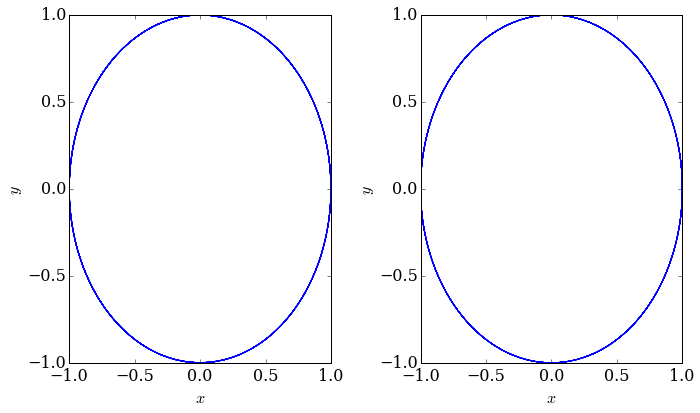

In [7]:
def fn_circular_motion(x, y):
    """Simple function for RK method example"""
    
    dfdt = np.zeros_like(y)
    dfdt[0] = -y[1]
    dfdt[1] =  y[0]
    
    return dfdt

# Example given above
y0 = np.array([1.0, 0.0])
t_0_1, y_0_1 = rk4_method(fn_circular_motion, 50.0, y0, 500)
t_0_01, y_0_01 = rk4_method(fn_circular_motion, 50.0, y0, 5000)

  
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax1.plot(y_0_1[:, 0], y_0_1[:, 1], 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2 = fig.add_subplot(122)
ax2.plot(y_0_01[:, 0], y_0_01[:, 1], 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
fig.tight_layout()
plt.show()

In [8]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax1.plot(t_0_1, np.sqrt(y_0_1[:, 0]**2 + y_0_1[:, 1]**2)-1.0, 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$r - 1$')
ax2 = fig.add_subplot(122)
ax2.plot(t_0_01, np.sqrt(y_0_01[:, 0]**2 + y_0_01[:, 1]**2)-1.0, 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$r - 1$')
fig.tight_layout()
plt.show()

### Convergence

In [9]:
import math

Npoints = np.array([50*2**i for i in range(0, 10)])
h = np.zeros_like(Npoints, float)
h = 50.0 / Npoints
err_r = np.zeros_like(h)
err_theta = np.zeros_like(h)
err_x = np.zeros_like(h)
err_y = np.zeros_like(h)
err_all = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = rk4_method(fn_circular_motion, 50.0, y0, N)
    err_r[i] = np.abs(y[-1, 0]**2 + y[-1, 1]**2 - 1.0)
    err_theta[i] = np.abs(math.atan2(y[-1, 1], y[-1, 0]) - np.mod(50.0, 2.0 * np.pi) + 2.0 * np.pi)
    err_x[i] = np.abs(y[-1, 0] - np.cos(50.0))
    err_y[i] = np.abs(y[-1, 1] - np.sin(50.0))
    err_all[i] = np.linalg.norm([y[-1, 0] - np.cos(50.0), y[-1, 1] - np.sin(50.0)], 2)

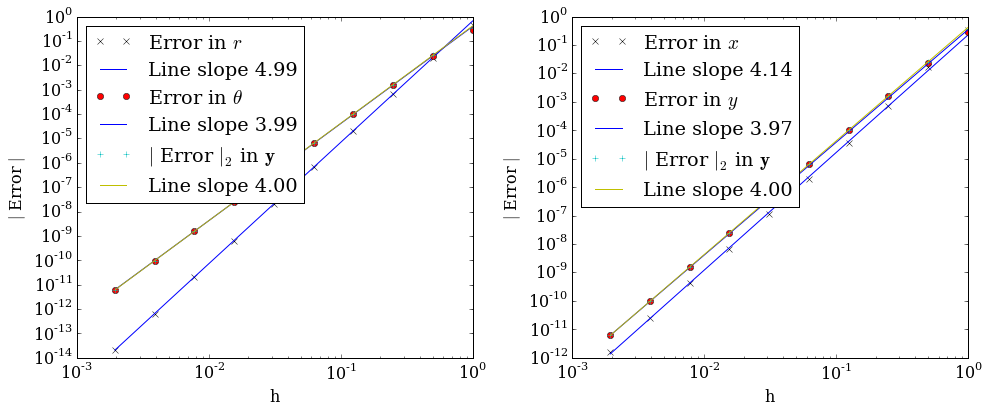

In [10]:
# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p_r = np.polyfit(np.log(h[1:]), np.log(err_r[1:]), 1)
p_theta = np.polyfit(np.log(h[1:]), np.log(err_theta[1:]), 1)
p_x = np.polyfit(np.log(h[1:]), np.log(err_x[1:]), 1)
p_y = np.polyfit(np.log(h[1:]), np.log(err_y[1:]), 1)
p_all = np.polyfit(np.log(h[1:]), np.log(err_all[1:]), 1)
    
fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(121)
ax1.loglog(h, err_r, 'kx', label = r'Error in $r$')
ax1.loglog(h, np.exp(p_r[1])*h**(p_r[0]), 'b-', label = "Line slope {:.2f}".format(p_r[0]))
ax1.loglog(h, err_theta, 'ro', label = r'Error in $\theta$')
ax1.loglog(h, np.exp(p_theta[1])*h**(p_theta[0]), 'b-', label = "Line slope {:.2f}".format(p_theta[0]))
ax1.loglog(h, err_all, 'c+', label = r'$\|$ Error $\|_2$ in ${\bf y}$')
ax1.loglog(h, np.exp(p_all[1])*h**(p_all[0]), 'y-', label = "Line slope {:.2f}".format(p_all[0]))
ax1.set_xlabel('h')
ax1.set_ylabel('$\|$ Error $\|$')
ax1.legend(loc = 2)
ax2 = fig.add_subplot(122)
ax2.loglog(h, err_x, 'kx', label = r'Error in $x$')
ax2.loglog(h, np.exp(p_x[1])*h**(p_x[0]), 'b-', label = "Line slope {:.2f}".format(p_x[0]))
ax2.loglog(h, err_theta, 'ro', label = r'Error in $y$')
ax2.loglog(h, np.exp(p_y[1])*h**(p_y[0]), 'b-', label = "Line slope {:.2f}".format(p_y[0]))
ax2.loglog(h, err_all, 'c+', label = r'$\|$ Error $\|_2$ in ${\bf y}$')
ax2.loglog(h, np.exp(p_all[1])*h**(p_all[0]), 'y-', label = "Line slope {:.2f}".format(p_all[0]))
ax2.set_xlabel('h')
ax2.set_ylabel('$\|$ Error $\|$')
ax2.legend(loc = 2)
fig.tight_layout()
plt.show()

We see that the error for any given *single* variable, such as $r$, need not converge at the expected rate (here we see $5^{\textrm{th}}$ order convergence instead of $4^{\textrm{th}}$). This may be due to cancellations in the error terms, possibly from the symmetry of the equation being solved. However, the *total* error, computed from a norm of the error in the state vector ${\bf y}$, does converge as expected. This error is dominated, for small enough $h$, by the worst case error.